# Lab - Ensemble Learning
## Shang mingxia P-COM0077/19

## 1. Input Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Data_Cortex_Nuclear.csv")

In [3]:
data=data.dropna(axis=0,how='any')

In [4]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,Control,Memantine,C/S,c-CS-m


In [5]:
data.dtypes

MouseID             object
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
                    ...   
RRP1_N             float64
BAX_N              float64
ARC_N              float64
ERBB4_N            float64
nNOS_N             float64
Tau_N              float64
G

In [9]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['class']=lb.fit_transform(data['class'])
data['Behavior']=lb.fit_transform(data['Behavior'])
data['Treatment']=lb.fit_transform(data['Treatment'])
data['Genotype']=lb.fit_transform(data['Genotype'])
data['MouseID']=lb.fit_transform(data['MouseID'])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
normData = scaler.fit_transform(data.astype(float))

In [11]:
x=data.drop('class',axis=1)
y=data['class']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)

## 2.Voting

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=7)
classifiers = []
classifiers.append(('clf1', dt))
classifiers.append(('clf2', gnb))
classifiers.append(('clf3', knn))
ensemble = VotingClassifier(classifiers, voting='hard')
ensemble.fit(X_train, y_train)
y_pred_vot = ensemble.predict(X_test)

In [14]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_vot))
print(classification_report(y_test, y_pred_vot))

[[11  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        19

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [16]:
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

[[11  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        19

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



## 3. Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
num_classifiers = 500
max_samples = len(X_train)
base_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
bag_clf = BaggingClassifier(base_estimator=base_clf,n_estimators=num_classifiers,max_samples=max_samples,bootstrap=True,random_state=1)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

[[11  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        19

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



## 4.Boosting

In [19]:
from sklearn.ensemble import AdaBoostClassifier
num_classifiers = 500
learning_rate = 0.07
ada_clf = AdaBoostClassifier(base_estimator=base_clf,
n_estimators=num_classifiers,
learning_rate=learning_rate)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

In [20]:
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

[[11  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        19

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [38]:
len(x)

552

## 5.Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=num_classifiers,criterion='gini', max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[11  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        19

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [32]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[9]
export_graphviz(tree, out_file = 'tree.dot',feature_names = x.columns,rounded = True)
# Use dot file to create a graph
(graph,) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

array([0.02628633, 0.02523783, 0.01611972, 0.00227569, 0.00257682,
       0.00167067, 0.00383673, 0.00292016, 0.01751703, 0.00334773,
       0.00840501, 0.03323762, 0.0032927 , 0.00501834, 0.00345057,
       0.00262583, 0.00393866, 0.00316357, 0.02032638, 0.00835328,
       0.01585085, 0.03672403, 0.00747593, 0.00412709, 0.00152232,
       0.00235797, 0.00330262, 0.00318645, 0.00179972, 0.00109655,
       0.00430417, 0.01176478, 0.00124424, 0.05123849, 0.00454639,
       0.0269742 , 0.00598317, 0.00823605, 0.00378456, 0.00514912,
       0.00632405, 0.00706759, 0.00304188, 0.01226487, 0.00389518,
       0.00132027, 0.01345769, 0.03888617, 0.00314471, 0.0131766 ,
       0.00524488, 0.01659529, 0.00737507, 0.00459789, 0.02239503,
       0.0069212 , 0.00481256, 0.02484303, 0.00432357, 0.01561932,
       0.00915962, 0.00889507, 0.00584724, 0.00772821, 0.00304381,
       0.00480562, 0.01456831, 0.01016287, 0.00849127, 0.00253469,
       0.00493916, 0.02105445, 0.00421813, 0.00233922, 0.00850

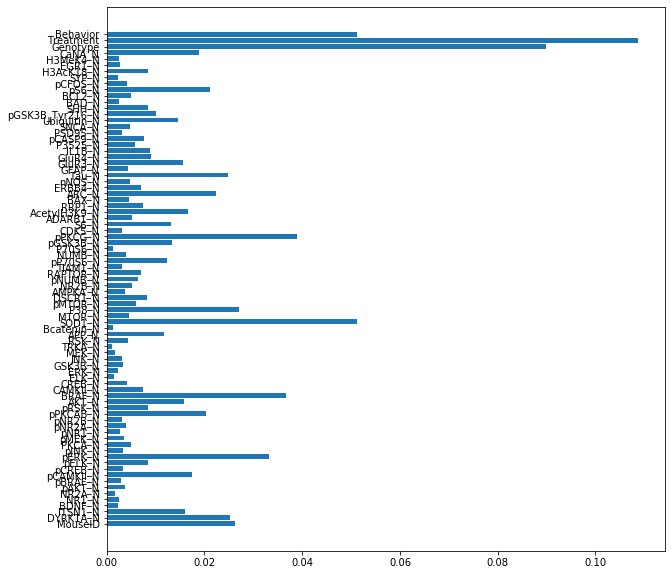

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
n_features = x.columns.size
feat_index = np.arange(n_features)
plt.figure(figsize=(10,10))
plt.barh(feat_index, rf.feature_importances_)
plt.yticks(feat_index, x)
plt.show()

## 6.Stacking

In [41]:
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=7)
meta_clf = SVC(gamma='scale')
clf_stack = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=meta_clf, store_train_meta_features=True)
clf_stack.fit(X_train, y_train)
y_pred_stack = clf_stack.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

[[11  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 15  1  0  0  0]
 [ 0  0  0  0 25  0  0  0]
 [ 0  0  0  0  2 15  0  0]
 [ 0  0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0  1 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21
           3       1.00      0.94      0.97        16
           4       0.89      1.00      0.94        25
           5       1.00      0.88      0.94        17
           6       0.93      1.00      0.96        13
           7       1.00      0.95      0.97        19

    accuracy                           0.97       138
   macro avg       0.98      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

